In [1]:
# To execute the multiple lines of code at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the required libraries
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
%matplotlib inline
sns.set(style="darkgrid")

# Load the required libraries for ANN
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math

## Step-1 Load the data

In [3]:
df=pd.read_csv(r'C:\Data\diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Step-2 Perform EDA on dataset

In [4]:
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)
df.head(1)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [5]:
#To check the null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
dtype: int64

In [6]:
df.describe()

,carat,depth %,table %,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Wait
* Do you see the Min. Values of X, Y and Z. It can't be possible..!!
* It doesn't make any sense to have either of Length or Width or Height to be zero..


Let's Have a look at them.

In [7]:
df.loc[(df['length']==0) | (df['width']==0) | (df['depth']==0)]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [8]:
len(df[(df['length']==0) | (df['width']==0) | (df['depth']==0)])

20

### We can see there are 20 rows with Dimensions 'Zero'.
We'll Drop them as it seems better choice instead of filling them with any of Mean or Median

In [9]:
df = df[(df[['length','width','depth']] != 0).all(axis=1)]

In [10]:
# Just to Confirm
df.loc[(df['length']==0) | (df['width']==0) | (df['depth']==0)]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth


In [11]:
# Nice and Clean. :)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth %  53920 non-null  float64
 5   table %  53920 non-null  float64
 6   price    53920 non-null  int64  
 7   length   53920 non-null  float64
 8   width    53920 non-null  float64
 9   depth    53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


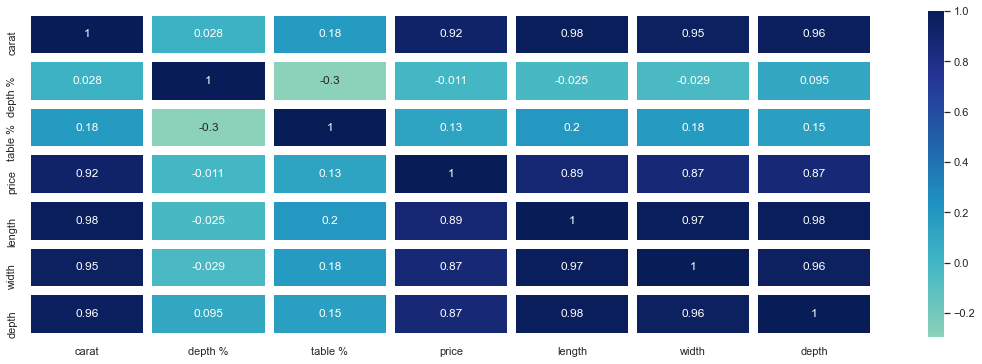

In [13]:
#To find the correlation of all features
plt.subplots(figsize=(19, 6))
sns.heatmap(df.corr(), annot=True, linewidths=8, center=0, cmap="YlGnBu");

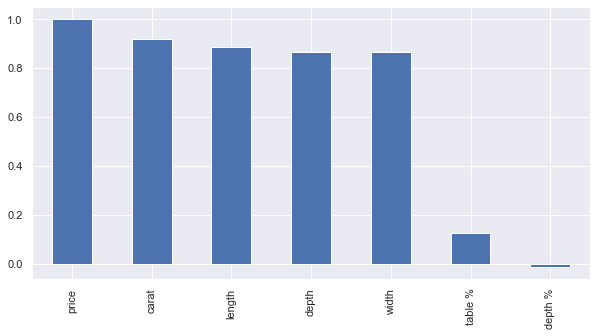

In [14]:
corr_mat = df.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

### Observation:
From the above plot, We can see that carat, length, width, depth, and price are having 
a high correlation with each other.
* depth% has less correlation with price so we can drop that.

### Color Vs Price

<AxesSubplot:xlabel='color', ylabel='price'>

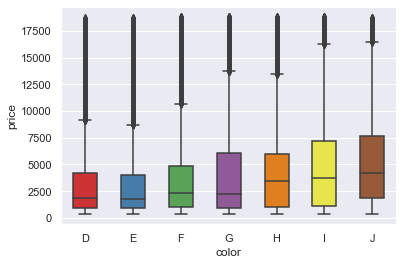

In [15]:
sns.boxplot(y='price',data=df,x='color',palette ='Set1',width =0.5,order = ['D','E','F','G','H','I','J'] )

### Observation:
* I and J color has highest prices of all remaining colors
* G, H, I and J type color has less number of outliers compared to D and E.It suggests that the better the quality of color the higher the outliers except for G type color.

### Cut Vs Price

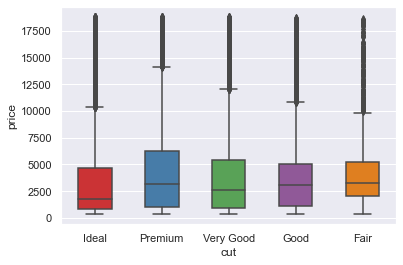

In [16]:
sns.boxplot(y='price',data=df,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] );

### Observation:
* Premium cut has highest price of all
* Fair..is the lower the quality of cut, the higher the number of outliers except for the Ideal cut type.

### Clarity Vs Price

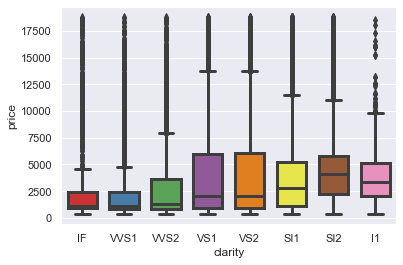

In [17]:
sns.boxplot(y='price',data=df,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']);

### Observation:
* Diamonds with clarity VS1 and VS2 has more prices.
* IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.

### Clarity vs cut

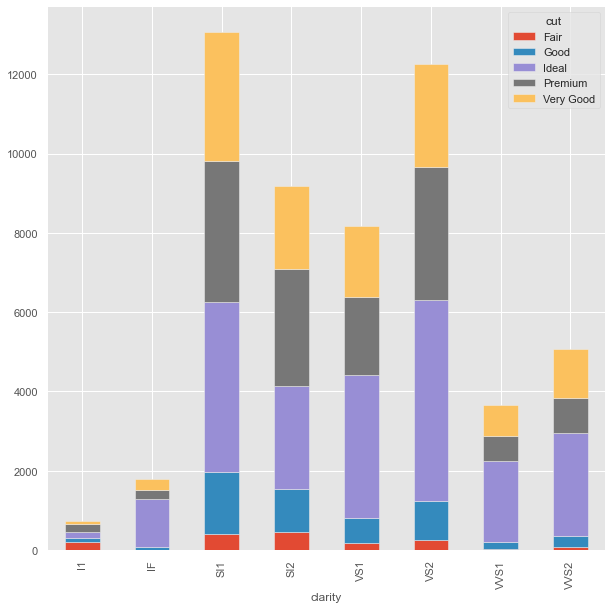

In [18]:
plt.style.use('ggplot')
clarity_cut_table = pd.crosstab(index=df["clarity"], columns=df["cut"])

clarity_cut_table.plot(kind="bar", figsize=(10,10),stacked=True)
plt.show();

### Observation:
We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category.

### Cut vs clarity

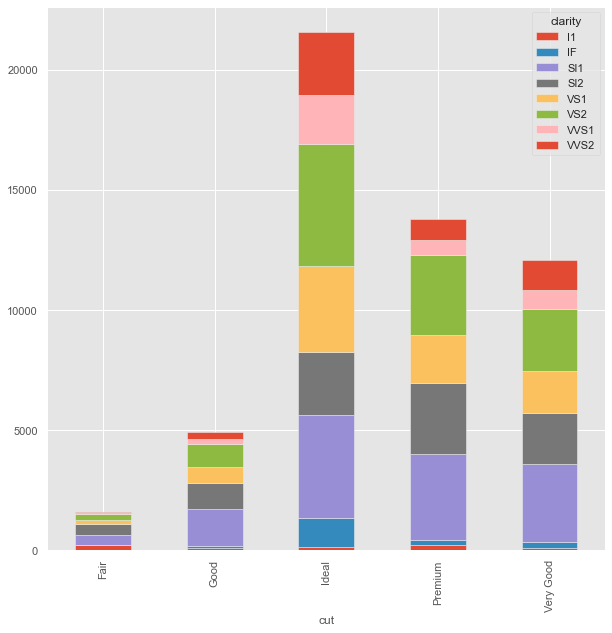

In [19]:
plt.style.use('ggplot')
clarity_cut_table = pd.crosstab(index=df["cut"], columns=df["clarity"])

clarity_cut_table.plot(kind="bar", figsize=(10,10),stacked=True)
plt.show();

### Observation:
It is good to prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.

### Color vs clarity

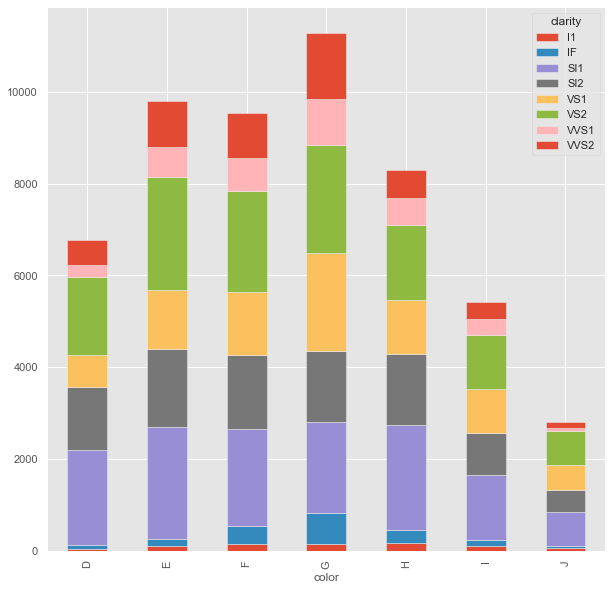

In [20]:
plt.style.use('ggplot')
clarity_cut_table = pd.crosstab(index=df["color"], columns=df["clarity"])

clarity_cut_table.plot(kind="bar", figsize=(10,10),stacked=True)
plt.show();

### Observation:
 *It is good to prefer G color followed by E, F, and H.In that the clarity they mostly prefer SI1 or SI2 category.*
 
Therefore from above all the plots, we can conclude that carat has high importance followed by cut, color, and clarity in predicting the price of a diamond.

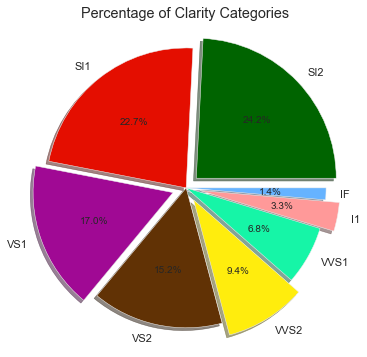

In [21]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0);
plt.axis('equal');
plt.title("Percentage of Clarity Categories");
plt.plot();
fig=plt.gcf();
fig.set_size_inches(6,6);
plt.show();

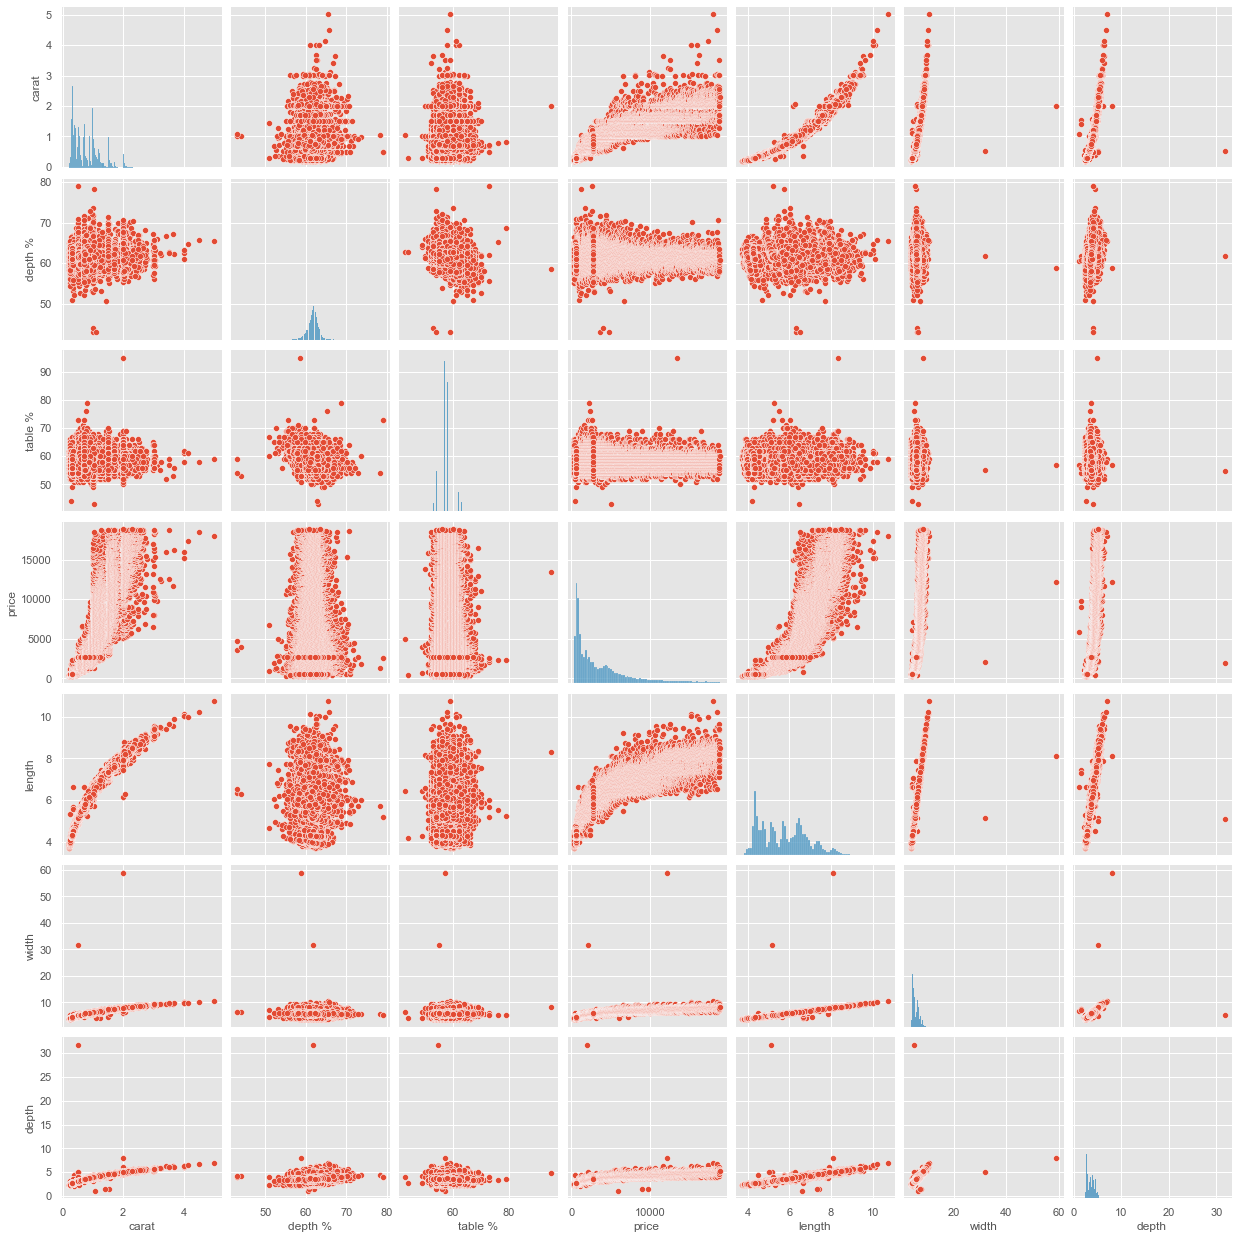

In [22]:
sns.pairplot(df);

### Dimensions
As the Dimensions increases, Obviously the Prices Rises as more and more Natural Resources are Utilised.

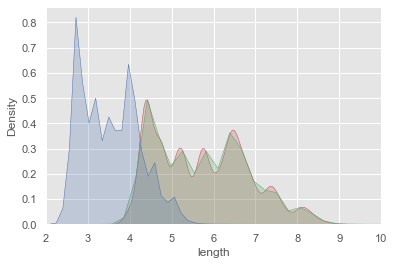

In [23]:
sns.kdeplot(df['length'] ,shade=True , color='r' )
sns.kdeplot(df['width'] , shade=True , color='g' )
sns.kdeplot(df['depth'] , shade= True , color='b')
plt.xlim(2,10);

### We'll Create a New Feature based on the Dimensions in the Next Section called 'Volume' and Visualize how it affects the Price.

### Create New Feature 'Volume'

In [24]:
df['volume'] = df['length']*df['width']*df['depth']
df.head()

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


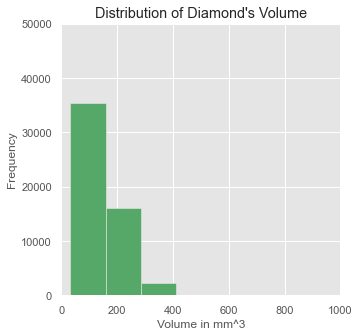

In [25]:
plt.figure(figsize=(5,5))
plt.hist( x=df['volume'] , bins=30 ,color='g');
plt.xlabel('Volume in mm^3');
plt.ylabel('Frequency');
plt.title('Distribution of Diamond\'s Volume');
plt.xlim(0,1000);
plt.ylim(0,50000);

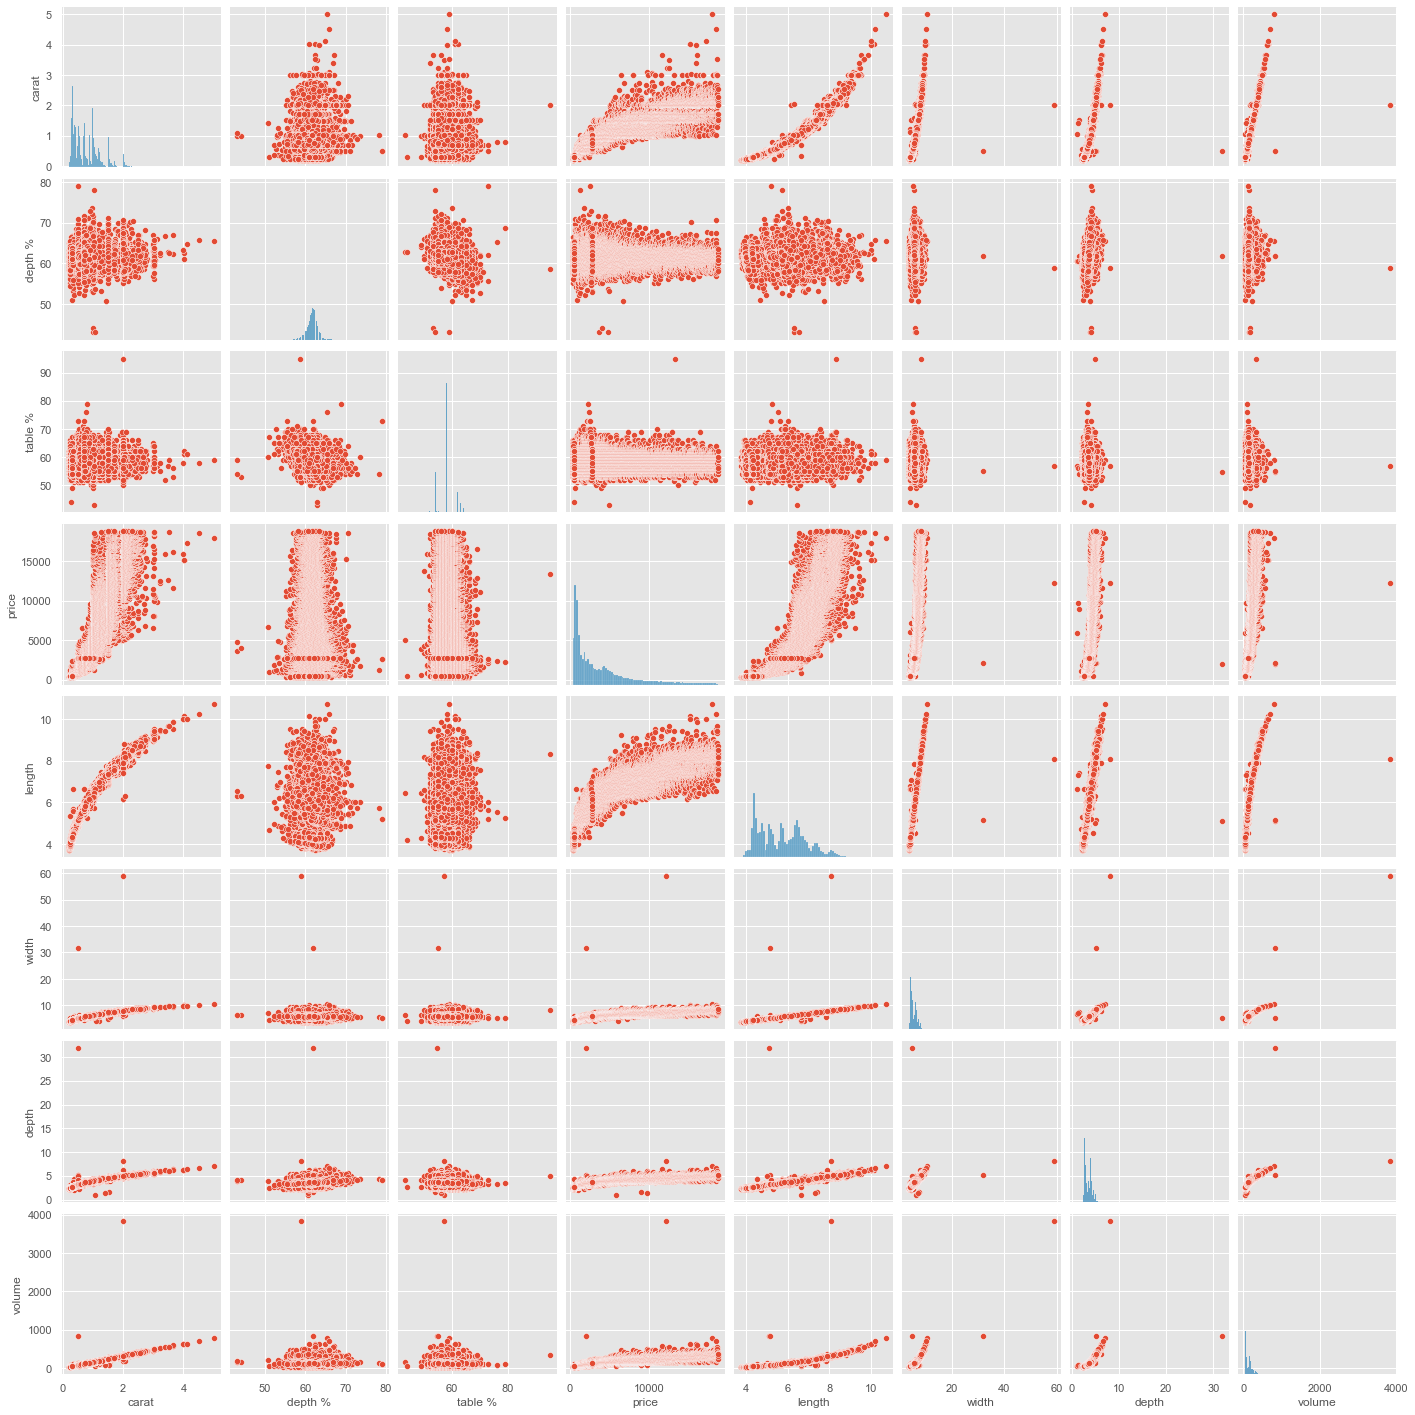

In [26]:
sns.pairplot(df);

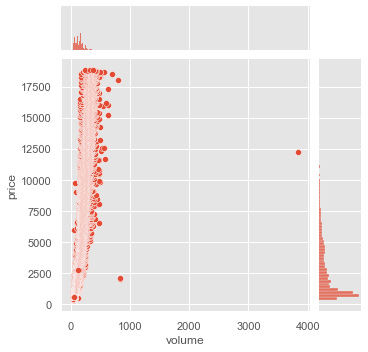

In [27]:
sns.jointplot(x='volume', y='price' , data=df, size=5)

## It seems that there is Linear Relationship between Price and Volume (x * y * z).


### Drop X, Y, Z


In [28]:
df.drop(['length','width','depth'], axis=1, inplace= True)

## Step-3 Handling Categorical features

In [29]:
#check the unique items in the categorical features so that we can give the priority values while converting the labels
df.cut.unique()
df.color.unique()
df.clarity.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [30]:
label = {'Ideal':4, 'Fair':0,'Good':1,'Very Good':2, 'Premium':3}
label1={'E':5, 'I':1, 'J':0, 'H':2, 'F':4, 'G':3, 'D':6}
label2={'SI2':1, 'SI1':2, 'VS1':4, 'VS2':3, 'VVS2':5, 'VVS1':6, 'I1':0, 'IF':7}

In [31]:
df['cut'] = df['cut'].map(lambda x: label[x])
df['color'] = df['color'].map(lambda x: label1[x])
df['clarity'] = df['clarity'].map(lambda x: label2[x])

In [32]:
df

,carat,cut,color,clarity,depth %,table %,price,volume
0,0.23,4,5,1,61.5,55.0,326,38.202030
1,0.21,3,5,2,59.8,61.0,326,34.505856
2,0.23,1,5,4,56.9,65.0,327,38.076885
3,0.29,3,1,3,62.4,58.0,334,46.724580
4,0.31,1,0,1,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,115.920000
53936,0.72,1,6,2,63.1,55.0,2757,118.110175
53937,0.70,2,6,2,62.8,60.0,2757,114.449728
53938,0.86,3,2,1,61.0,58.0,2757,140.766120


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int64  
 2   color    53920 non-null  int64  
 3   clarity  53920 non-null  int64  
 4   depth %  53920 non-null  float64
 5   table %  53920 non-null  float64
 6   price    53920 non-null  int64  
 7   volume   53920 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 5.7 MB


## Step-4 Seperate features and Labels


In [34]:
target=df['price']
df=df.drop("price",axis=1)

In [35]:
df.shape
target.shape

(53920, 7)

(53920,)

In [36]:
df

,carat,cut,color,clarity,depth %,table %,volume
0,0.23,4,5,1,61.5,55.0,38.202030
1,0.21,3,5,2,59.8,61.0,34.505856
2,0.23,1,5,4,56.9,65.0,38.076885
3,0.29,3,1,3,62.4,58.0,46.724580
4,0.31,1,0,1,63.3,58.0,51.917250
...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,115.920000
53936,0.72,1,6,2,63.1,55.0,118.110175
53937,0.70,2,6,2,62.8,60.0,114.449728
53938,0.86,3,2,1,61.0,58.0,140.766120


## Step-5 Normalizing the data

In [37]:
# using Modules from sklearn
from sklearn.preprocessing import MinMaxScaler
rescale=MinMaxScaler()
independent_features=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
normalize_train_data=rescale.fit_transform(df)
print(normalize_train_data.shape, type(normalize_train_data))

(53920, 7) <class 'numpy.ndarray'>


In [38]:
normalize_train_data=pd.DataFrame(normalize_train_data)

## Step-6 Split the dataset to train and test 

In [39]:
# Using sklearn module
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(normalize_train_data,target,train_size=0.75,random_state=0)
X_train.shape

(40440, 7)

In [40]:
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)


(40440, 7) (40440,) (13480, 7) (13480,)


## Step-7 Model Building (ANN) 

In [41]:
model1 =tf.keras.Sequential()
model1.add(layers.Dense(8, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model1.add(layers.Dense(1, activation='linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [42]:
model2 =tf.keras.Sequential()
model2.add(layers.Dense(12, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1, activation='linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [43]:
model3 =tf.keras.Sequential()
model3.add(layers.Dense(8, input_dim=X_train.shape[1], kernel_initializer='normal', activation='elu'))
model3.add(layers.Dense(1, activation='linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [44]:
model4 =tf.keras.Sequential()
model4.add(layers.Dense(12, input_dim=X_train.shape[1], kernel_initializer='normal', activation='elu'))
model4.add(layers.Dense(8, activation='elu'))
model4.add(layers.Dense(1, activation='linear'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [45]:
model5 =tf.keras.Sequential()
model5.add(layers.Dense(29, input_dim=X_train.shape[1], kernel_initializer='normal', activation='elu'))
model5.add(layers.Dense(24, activation='elu'))
model5.add(layers.Dense(20, activation='elu'))
model5.add(layers.Dense(1, activation='linear'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 29)                232       
_________________________________________________________________
dense_11 (Dense)             (None, 24)                720       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [46]:
model6 =tf.keras.Sequential()
model6.add(layers.Dense(8, input_dim=X_train.shape[1], kernel_initializer='normal', activation='elu'))
model6.add(layers.Dense(2670, activation='elu'))
model6.add(layers.Dense(1, activation='linear'))
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_15 (Dense)             (None, 2670)              24030     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 2671      
Total params: 26,765
Trainable params: 26,765
Non-trainable params: 0
_________________________________________________________________


In [47]:
model7 =tf.keras.Sequential()
model7.add(layers.Dense(8, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model7.add(layers.Dense(2670, activation='relu'))
model7.add(layers.Dense(1, activation='linear'))
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_18 (Dense)             (None, 2670)              24030     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 2671      
Total params: 26,765
Trainable params: 26,765
Non-trainable params: 0
_________________________________________________________________


In [48]:
# create ANN model
model8 =tf.keras.Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model8.add(layers.Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model8.add(layers.Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model8.add(layers.Dense(1, kernel_initializer='normal'))
 

## Step-8 Model evaluation

In [49]:
model1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history1=model1.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
y_pred1 = model1.predict(X_test).flatten()

Epoch 1/30
216/216 [==============================] - 0s 2ms/step - loss: 30951080.0000 - mse: 30951080.0000 - mae: 3901.2939 - val_loss: 31819024.0000 - val_mse: 31819024.0000 - val_mae: 3969.6770
Epoch 2/30
216/216 [==============================] - 0s 1ms/step - loss: 30911032.0000 - mse: 30911032.0000 - mae: 3896.1614 - val_loss: 31761322.0000 - val_mse: 31761322.0000 - val_mae: 3962.4263
Epoch 3/30
216/216 [==============================] - 0s 2ms/step - loss: 30837758.0000 - mse: 30837758.0000 - mae: 3886.8181 - val_loss: 31670422.0000 - val_mse: 31670422.0000 - val_mae: 3950.9766
Epoch 4/30
216/216 [==============================] - 0s 2ms/step - loss: 30733118.0000 - mse: 30733118.0000 - mae: 3873.3752 - val_loss: 31548876.0000 - val_mse: 31548876.0000 - val_mae: 3935.6152
Epoch 5/30
216/216 [==============================] - 0s 2ms/step - loss: 30599964.0000 - mse: 30599964.0000 - mae: 3856.1936 - val_loss: 31400108.0000 - val_mse: 31400108.0000 - val_mae: 3916.7297
Epoch 6/30

In [50]:
model2.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history2=model2.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
y_pred2 = model2.predict(X_test).flatten()

Epoch 1/30
216/216 [==============================] - 0s 2ms/step - loss: 30932950.0000 - mse: 30932950.0000 - mae: 3898.9907 - val_loss: 31745966.0000 - val_mse: 31745966.0000 - val_mae: 3960.4739
Epoch 2/30
216/216 [==============================] - 0s 2ms/step - loss: 30643174.0000 - mse: 30643174.0000 - mae: 3861.4795 - val_loss: 31181676.0000 - val_mse: 31181676.0000 - val_mae: 3888.7776
Epoch 3/30
216/216 [==============================] - 0s 2ms/step - loss: 29719828.0000 - mse: 29719828.0000 - mae: 3740.1445 - val_loss: 29827618.0000 - val_mse: 29827618.0000 - val_mae: 3711.0977
Epoch 4/30
216/216 [==============================] - 0s 2ms/step - loss: 27967276.0000 - mse: 27967276.0000 - mae: 3499.6260 - val_loss: 27624228.0000 - val_mse: 27624228.0000 - val_mae: 3408.8318
Epoch 5/30
216/216 [==============================] - 0s 2ms/step - loss: 25470570.0000 - mse: 25470570.0000 - mae: 3189.1343 - val_loss: 24792392.0000 - val_mse: 24792392.0000 - val_mae: 3129.9370
Epoch 6/30

In [51]:
model3.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history3=model3.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
y_pred3= model3.predict(X_test).flatten()

Epoch 1/30
216/216 [==============================] - 0s 2ms/step - loss: 30943126.0000 - mse: 30943124.0000 - mae: 3900.2751 - val_loss: 31803348.0000 - val_mse: 31803348.0000 - val_mae: 3967.7051
Epoch 2/30
216/216 [==============================] - 0s 2ms/step - loss: 30888866.0000 - mse: 30888866.0000 - mae: 3893.3550 - val_loss: 31732384.0000 - val_mse: 31732384.0000 - val_mae: 3958.7732
Epoch 3/30
216/216 [==============================] - 0s 2ms/step - loss: 30804140.0000 - mse: 30804138.0000 - mae: 3882.4595 - val_loss: 31631198.0000 - val_mse: 31631198.0000 - val_mae: 3946.0051
Epoch 4/30
216/216 [==============================] - 0s 2ms/step - loss: 30690154.0000 - mse: 30690158.0000 - mae: 3867.8142 - val_loss: 31500820.0000 - val_mse: 31500820.0000 - val_mae: 3929.4973
Epoch 5/30
216/216 [==============================] - 0s 2ms/step - loss: 30548604.0000 - mse: 30548604.0000 - mae: 3849.5005 - val_loss: 31343652.0000 - val_mse: 31343652.0000 - val_mae: 3909.5046
Epoch 6/30

In [52]:
model4.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history4=model4.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
y_pred4 = model4.predict(X_test).flatten()

Epoch 1/30
216/216 [==============================] - 0s 2ms/step - loss: 30920392.0000 - mse: 30920392.0000 - mae: 3897.3953 - val_loss: 31738716.0000 - val_mse: 31738716.0000 - val_mae: 3959.5559
Epoch 2/30
216/216 [==============================] - 0s 2ms/step - loss: 30723742.0000 - mse: 30723742.0000 - mae: 3872.1738 - val_loss: 31412276.0000 - val_mse: 31412276.0000 - val_mae: 3918.2009
Epoch 3/30
216/216 [==============================] - 0s 2ms/step - loss: 30229802.0000 - mse: 30229802.0000 - mae: 3807.7756 - val_loss: 30715288.0000 - val_mse: 30715288.0000 - val_mae: 3828.4202
Epoch 4/30
216/216 [==============================] - 0s 2ms/step - loss: 29336100.0000 - mse: 29336100.0000 - mae: 3688.7205 - val_loss: 29587440.0000 - val_mse: 29587440.0000 - val_mae: 3678.5188
Epoch 5/30
216/216 [==============================] - 0s 2ms/step - loss: 28021522.0000 - mse: 28021524.0000 - mae: 3506.6575 - val_loss: 28043222.0000 - val_mse: 28043222.0000 - val_mae: 3465.1943
Epoch 6/30

In [53]:
model5.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history5=model5.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
y_pred5 = model5.predict(X_test).flatten()

Epoch 1/30
216/216 [==============================] - 1s 3ms/step - loss: 30397260.0000 - mse: 30397260.0000 - mae: 3828.4204 - val_loss: 29311616.0000 - val_mse: 29311616.0000 - val_mae: 3640.8501
Epoch 2/30
216/216 [==============================] - 1s 2ms/step - loss: 21922136.0000 - mse: 21922136.0000 - mae: 3036.9568 - val_loss: 16615957.0000 - val_mse: 16615957.0000 - val_mae: 2916.7832
Epoch 3/30
216/216 [==============================] - 1s 2ms/step - loss: 15588478.0000 - mse: 15588478.0000 - mae: 2979.4600 - val_loss: 15663446.0000 - val_mse: 15663447.0000 - val_mae: 3011.4810
Epoch 4/30
216/216 [==============================] - 0s 2ms/step - loss: 15097413.0000 - mse: 15097413.0000 - mae: 2970.2610 - val_loss: 15153541.0000 - val_mse: 15153541.0000 - val_mae: 2964.3972
Epoch 5/30
216/216 [==============================] - 1s 2ms/step - loss: 14467751.0000 - mse: 14467752.0000 - mae: 2904.0762 - val_loss: 14215493.0000 - val_mse: 14215493.0000 - val_mae: 2851.0146
Epoch 6/30

In [54]:
model6.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history6=model6.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
y_pred6 = model6.predict(X_test).flatten()

Epoch 1/30
216/216 [==============================] - 1s 6ms/step - loss: 27147354.0000 - mse: 27147352.0000 - mae: 3464.5925 - val_loss: 19823644.0000 - val_mse: 19823644.0000 - val_mae: 2878.6660
Epoch 2/30
216/216 [==============================] - 1s 5ms/step - loss: 16142834.0000 - mse: 16142834.0000 - mae: 2935.6182 - val_loss: 15689021.0000 - val_mse: 15689021.0000 - val_mae: 3019.3342
Epoch 3/30
216/216 [==============================] - 1s 5ms/step - loss: 15004865.0000 - mse: 15004865.0000 - mae: 2955.9177 - val_loss: 14893220.0000 - val_mse: 14893220.0000 - val_mae: 2933.7188
Epoch 4/30
216/216 [==============================] - 1s 6ms/step - loss: 13811745.0000 - mse: 13811745.0000 - mae: 2816.5300 - val_loss: 12809898.0000 - val_mse: 12809897.0000 - val_mae: 2659.4624
Epoch 5/30
216/216 [==============================] - 1s 6ms/step - loss: 9977144.0000 - mse: 9977144.0000 - mae: 2282.3340 - val_loss: 7407744.5000 - val_mse: 7407744.5000 - val_mae: 1904.5442
Epoch 6/30
216

In [55]:
model7.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history7=model7.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
y_pred7 = model7.predict(X_test).flatten()

Epoch 1/30
216/216 [==============================] - 1s 5ms/step - loss: 27944888.0000 - mse: 27944888.0000 - mae: 3547.7224 - val_loss: 20409690.0000 - val_mse: 20409690.0000 - val_mae: 2902.7720
Epoch 2/30
216/216 [==============================] - 1s 4ms/step - loss: 16113815.0000 - mse: 16113815.0000 - mae: 2947.5686 - val_loss: 15547799.0000 - val_mse: 15547799.0000 - val_mae: 2991.6538
Epoch 3/30
216/216 [==============================] - 1s 5ms/step - loss: 14752527.0000 - mse: 14752526.0000 - mae: 2932.2437 - val_loss: 14533308.0000 - val_mse: 14533308.0000 - val_mae: 2923.3882
Epoch 4/30
216/216 [==============================] - 1s 4ms/step - loss: 13560580.0000 - mse: 13560580.0000 - mae: 2808.3921 - val_loss: 13004554.0000 - val_mse: 13004553.0000 - val_mae: 2738.7554
Epoch 5/30
216/216 [==============================] - 1s 4ms/step - loss: 11590931.0000 - mse: 11590931.0000 - mae: 2567.4976 - val_loss: 10429094.0000 - val_mse: 10429094.0000 - val_mae: 2402.3242
Epoch 6/30

In [56]:
model8.compile(loss='mean_squared_error', optimizer='adam')
history8=model8.fit(X_train, y_train ,epochs=30, batch_size=150, verbose=1, validation_split=0.2)
y_pred8 = model8.predict(X_test).flatten()

Epoch 1/30
216/216 [==============================] - 0s 2ms/step - loss: 30955312.0000 - val_loss: 31828290.0000
Epoch 2/30
216/216 [==============================] - 0s 2ms/step - loss: 30938256.0000 - val_loss: 31814180.0000
Epoch 3/30
216/216 [==============================] - 0s 2ms/step - loss: 30925944.0000 - val_loss: 31802512.0000
Epoch 4/30
216/216 [==============================] - 0s 2ms/step - loss: 30914834.0000 - val_loss: 31791452.0000
Epoch 5/30
216/216 [==============================] - 0s 2ms/step - loss: 30904132.0000 - val_loss: 31780700.0000
Epoch 6/30
216/216 [==============================] - 0s 2ms/step - loss: 30893642.0000 - val_loss: 31770114.0000
Epoch 7/30
216/216 [==============================] - 0s 2ms/step - loss: 30883286.0000 - val_loss: 31759602.0000
Epoch 8/30
216/216 [==============================] - 0s 2ms/step - loss: 30873012.0000 - val_loss: 31749176.0000
Epoch 9/30
216/216 [==============================] - 0s 2ms/step - loss: 30862798.0000 

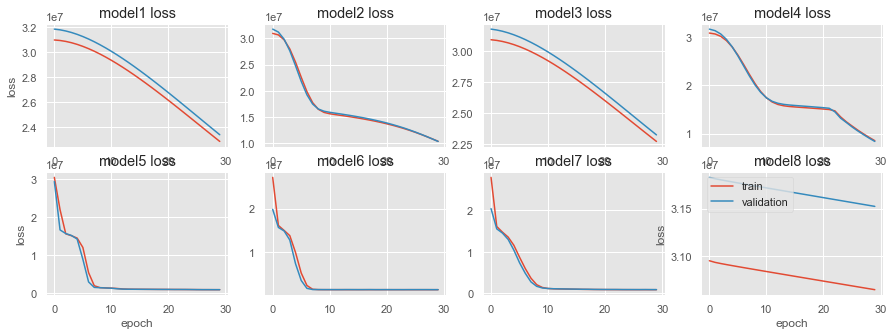

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(2,4,1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss');
plt.ylabel('loss');

plt.subplot(2,4,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss');

plt.subplot(2,4,3)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model3 loss');

plt.subplot(2,4,4)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model4 loss');

plt.subplot(2,4,5)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model5 loss');
plt.ylabel('loss');
plt.xlabel('epoch');


plt.subplot(2,4,6)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model6 loss');

plt.subplot(2,4,7)
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model7 loss');

plt.subplot(2,4,8)
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model8 loss');


plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'validation'], loc='upper left');
plt.show();

### Observation:
      By seeing the above graphs we can easily says that tanh is bad activation function for this problem and elu works better with highest layers(model5,6) in reducing the loss.

## Evalution by metrics

In [58]:
print("*********Model1 metrics********")
mean_absolute_error(y_test, y_pred1)
mean_squared_error(y_test,y_pred1)
math.sqrt(mean_squared_error(y_test,y_pred1))

*********Model1 metrics********


3040.626027577567

23492519.671206307

4846.908259004528

In [59]:
print("*********Model2 metrics********")
mean_absolute_error(y_test, y_pred2)
mean_squared_error(y_test,y_pred2)
math.sqrt(mean_squared_error(y_test,y_pred2))

*********Model2 metrics********


2390.6694209429916

10547651.20233438

3247.7147661601043

In [60]:
print("*********Model3 metrics********")
mean_absolute_error(y_test, y_pred3)
mean_squared_error(y_test,y_pred3)
math.sqrt(mean_squared_error(y_test,y_pred3))

*********Model3 metrics********


3031.591638622793

23348964.66154392

4832.076640694342

In [61]:
print("*********Model4 metrics********")
mean_absolute_error(y_test, y_pred4)
mean_squared_error(y_test,y_pred4)
math.sqrt(mean_squared_error(y_test,y_pred4))

*********Model4 metrics********


2075.764672942119

8518421.753287977

2918.6335421371377

In [62]:
print("*********Model5 metrics********")
mean_absolute_error(y_test, y_pred5)
mean_squared_error(y_test,y_pred5)
math.sqrt(mean_squared_error(y_test,y_pred5))

*********Model5 metrics********


634.4377519016097

949554.9919063179

974.4511234055394

In [63]:
print("*********Model6 metrics********")
mean_absolute_error(y_test, y_pred6)
mean_squared_error(y_test,y_pred6)
math.sqrt(mean_squared_error(y_test,y_pred6))

*********Model6 metrics********


853.5585047132272

1494249.8545871505

1222.3951303024528

In [64]:
print("*********Model7 metrics********")
mean_absolute_error(y_test, y_pred7)
mean_squared_error(y_test,y_pred7)
math.sqrt(mean_squared_error(y_test,y_pred7))

*********Model7 metrics********


489.52649914999034

1019843.7976722821

1009.8731591998483

In [65]:
print("*********Model8 metrics********")
mean_absolute_error(y_test, y_pred8)
mean_squared_error(y_test,y_pred8)
math.sqrt(mean_squared_error(y_test,y_pred8))

*********Model8 metrics********


3933.8639153423933

31671971.209450427

5627.785639969812

### Observation:
    Out of all models, Model 5 has the mean absolute error and root mean squared error are lower when using ELU as opposed to ReLU.

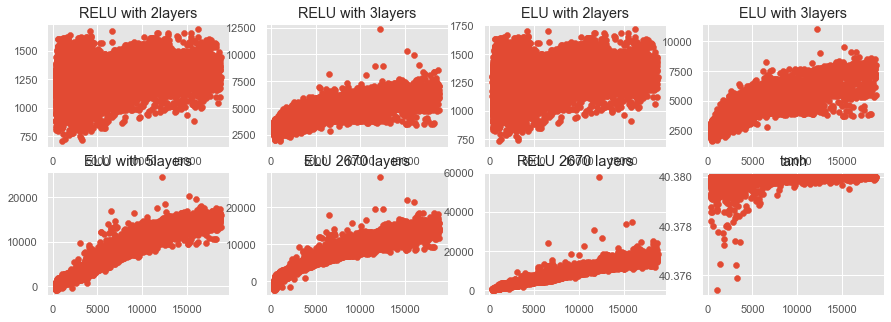

In [66]:
plt.figure(figsize=(15,5));
plt.subplot(2,4,1);
plt.title("RELU with 2layers");
plt.scatter(y_test,y_pred1);
plt.subplot(2,4,2);
plt.title("RELU with 3layers");
plt.scatter(y_test,y_pred2);
plt.subplot(2,4,3);
plt.title("ELU with 2layers");
plt.scatter(y_test,y_pred3);
plt.subplot(2,4,4);
plt.title("ELU with 3layers");
plt.scatter(y_test,y_pred4);
plt.subplot(2,4,5);
plt.title("ELU with 5layers");
plt.scatter(y_test,y_pred5);
plt.subplot(2,4,6);
plt.title("ELU 2670 layers");
plt.scatter(y_test,y_pred6);
plt.subplot(2,4,7);
plt.title("RELU 2670 layers");
plt.scatter(y_test,y_pred7);
plt.subplot(2,4,8);
plt.title("tanh");
plt.scatter(y_test,y_pred8);

### Model-5,6,7 had used an activation function '*elu*' gave good prediction

## Hyperparameter tuning of ANN

Finding the best values for batch_size and epoch is very important as it directly affects the model performance. Bad values can lead to overfitting or underfitting

In [67]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    batch_size_list=[5, 10, 15, 20,30,40]
    epoch_list  =   [5, 10, 50, 100,150,200]
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters'])
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            model =tf.keras.Sequential()
            model.add(layers.Dense(29, input_dim=X_train.shape[1], kernel_initializer='normal', activation='elu'))
            model.add(layers.Dense(24, activation='elu'))
            model.add(layers.Dense(20, activation='elu'))
            model.add(layers.Dense(1, activation='linear'))
            
            model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
            model.fit(X_train, y_train, batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            y_pred=model.predict(X_test).flatten()
            
    
            MAPE = np.mean(100 * (np.abs(y_test-y_pred)/y_test))            
            
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial,'Accuracy:', 100-MAPE)
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial),100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
    

In [68]:
FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 75.75628662109375
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 82.89055061340332
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 90.21079063415527
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 90.59344100952148
5 Parameters: batch_size: 5 - epochs: 150 Accuracy: 90.77671432495117
6 Parameters: batch_size: 5 - epochs: 200 Accuracy: 90.87975978851318
7 Parameters: batch_size: 10 - epochs: 5 Accuracy: 76.02594375610352
8 Parameters: batch_size: 10 - epochs: 10 Accuracy: 78.2629222869873
9 Parameters: batch_size: 10 - epochs: 50 Accuracy: 89.52750968933105
10 Parameters: batch_size: 10 - epochs: 100 Accuracy: 89.62150478363037
11 Parameters: batch_size: 10 - epochs: 150 Accuracy: 91.05850601196289
12 Parameters: batch_size: 10 - epochs: 200 Accuracy: 88.81694889068604
13 Parameters: batch_size: 15 - epochs: 5 Accuracy: 75.12038612365723
14 Parameters: batch_size: 15 - epochs: 10 Accuracy: 78.6867561340332
15 Parameters: batch

,TrialNumber,Parameters,MSE,R2,Accuracy
0,1,5-5,NaN,NaN,75.756287
0,2,5-10,NaN,NaN,82.890551
0,3,5-50,NaN,NaN,90.210791
0,4,5-100,NaN,NaN,90.593441
0,5,5-150,NaN,NaN,90.776714
0,6,5-200,NaN,NaN,90.879760
0,7,10-5,NaN,NaN,76.025944
0,8,10-10,NaN,NaN,78.262922
0,9,10-50,NaN,NaN,89.527510
0,10,10-100,NaN,NaN,89.621505


#### NOTE: I made a Trail with accuracy not mae and mse so thats y it is showing null values in MSE,MAE columns.

## Observation:
    Here I just focussed on Accuracy ...Out of all accuracys the best accuary came for batch size:10 with 150 epochs got    
    91.058506.But for easch batch size and with more than or equal to 100 epochs is good to choose for this model.
        

In [67]:
def FunctionFindBestParamss(X_train, y_train, X_test, y_test):
    batch_size_list=[5, 10, 15, 20,32,40,50]
    epoch_list  =   [5, 10, 50, 100,150,200,250]
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'MSE','R2'])
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            model =tf.keras.Sequential()
            model.add(layers.Dense(29, input_dim=X_train.shape[1], kernel_initializer='normal', activation='elu'))
            model.add(layers.Dense(24, activation='elu'))
            model.add(layers.Dense(20, activation='elu'))
            model.add(layers.Dense(1, activation='linear'))
            
            model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
            model.fit(X_train, y_train, batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            y_pred=model.predict(X_test).flatten()
            
            MSE=mean_squared_error(y_test,y_pred)
            R2=r2_score(y_test,y_pred)
            MAPE = np.mean(100 * (np.abs(y_test-y_pred)/y_test))            
            
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'MSE:', MSE,'R2:',R2,'Accuracy:', 100-MAPE)
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), MSE,R2,100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'MSE','R2', 'Accuracy'] ))
    return(SearchResultsData)

In [68]:
FunctionFindBestParamss(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 MSE: 927781.2796831441 R2: 0.9427178324893626 Accuracy: 75.62959098815918
2 Parameters: batch_size: 5 - epochs: 10 MSE: 604760.7574296299 R2: 0.9626614507432453 Accuracy: 85.27472019195557
3 Parameters: batch_size: 5 - epochs: 50 MSE: 408077.7006608472 R2: 0.9748048643376448 Accuracy: 90.21196460723877
4 Parameters: batch_size: 5 - epochs: 100 MSE: 335181.55975025415 R2: 0.9793055468217166 Accuracy: 89.50395584106445
5 Parameters: batch_size: 5 - epochs: 150 MSE: 353315.0662344772 R2: 0.9781859655381415 Accuracy: 90.50188446044922
6 Parameters: batch_size: 5 - epochs: 200 MSE: 326451.3508742157 R2: 0.979844558869266 Accuracy: 89.98848724365234
7 Parameters: batch_size: 5 - epochs: 250 MSE: 320056.96589235356 R2: 0.9802393547545458 Accuracy: 90.61334133148193
8 Parameters: batch_size: 10 - epochs: 5 MSE: 963311.607322825 R2: 0.9405241536297729 Accuracy: 77.36540985107422
9 Parameters: batch_size: 10 - epochs: 10 MSE: 923266.3170653721 R2: 0.942996

,TrialNumber,Parameters,MSE,R2,Accuracy
0,1,5-5,9.277813e+05,0.942718,75.629591
0,2,5-10,6.047608e+05,0.962661,85.274720
0,3,5-50,4.080777e+05,0.974805,90.211965
0,4,5-100,3.351816e+05,0.979306,89.503956
0,5,5-150,3.533151e+05,0.978186,90.501884
0,6,5-200,3.264514e+05,0.979845,89.988487
0,7,5-250,3.200570e+05,0.980239,90.613341
0,8,10-5,9.633116e+05,0.940524,77.365410
0,9,10-10,9.232663e+05,0.942997,76.663496
0,10,10-50,3.741728e+05,0.976898,88.477837


### Observation:
    After doing the hyperparameter tuning What I found was ->The more epochs which are greater than or equal to 100 gives the best accuracy and also less Mean square error.

## Conclusion:
    

#### For this data, Out of all activation functions, **Elu**  with works well on the data. And while fitting the data, for 150 & 250 epochs the best accuracy came i.e,91.058506